In [1]:
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib qt5
plt.style.use('ggplot')
import mne
import pandas as pd
from mne.channels.montage import get_builtin_montages
import numpy as np
import sys
from datetime import time
from datetime import datetime 





from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt
plt.style.use("ggplot")

from mne import io, EvokedArray
from mne.decoding import Vectorizer, get_coef
from mne.decoding import SlidingEstimator, cross_val_multiscore

from imblearn.ensemble import BalancedRandomForestClassifier


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate



# import a linear classifier from mne.decoding
from mne.decoding import LinearModel

Using TensorFlow backend.
//anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Future

In [4]:
recs_l = []
with open('chb-mit-scalp-eeg-database-1.0.0/RECORDS') as f:
    line_list = f.read().splitlines()
    for elem in line_list:
        if len(elem) > 1:
            recs_l.append(elem)
      

In [9]:
recs_l

['chb01/chb01_01.edf',
 'chb01/chb01_02.edf',
 'chb01/chb01_03.edf',
 'chb01/chb01_04.edf',
 'chb01/chb01_05.edf',
 'chb01/chb01_06.edf',
 'chb01/chb01_07.edf',
 'chb01/chb01_08.edf',
 'chb01/chb01_09.edf',
 'chb01/chb01_10.edf',
 'chb01/chb01_11.edf',
 'chb01/chb01_12.edf',
 'chb01/chb01_13.edf',
 'chb01/chb01_14.edf',
 'chb01/chb01_15.edf',
 'chb01/chb01_16.edf',
 'chb01/chb01_17.edf',
 'chb01/chb01_18.edf',
 'chb01/chb01_19.edf',
 'chb01/chb01_20.edf',
 'chb01/chb01_21.edf',
 'chb01/chb01_22.edf',
 'chb01/chb01_23.edf',
 'chb01/chb01_24.edf',
 'chb01/chb01_25.edf',
 'chb01/chb01_26.edf',
 'chb01/chb01_27.edf',
 'chb01/chb01_29.edf',
 'chb01/chb01_30.edf',
 'chb01/chb01_31.edf',
 'chb01/chb01_32.edf',
 'chb01/chb01_33.edf',
 'chb01/chb01_34.edf',
 'chb01/chb01_36.edf',
 'chb01/chb01_37.edf',
 'chb01/chb01_38.edf',
 'chb01/chb01_39.edf',
 'chb01/chb01_40.edf',
 'chb01/chb01_41.edf',
 'chb01/chb01_42.edf',
 'chb01/chb01_43.edf',
 'chb01/chb01_46.edf',
 'chb02/chb02_01.edf',
 'chb02/chb

In [5]:
rec_wsl = []
with open('chb-mit-scalp-eeg-database-1.0.0/RECORDS-WITH-SEIZURES') as f:
    line_list = f.readlines()
    for elem in line_list:
        if len(elem) > 1:
            rec_wsl.append(elem.split("/")[1].split('.')[0])
rec_wsl[34] = 'chb07_19'            

In [6]:
rec_wos = []
for rec in recs_l:
    rec_name = rec.split('/')[1].split('.')[0]
    rec_wos.append(rec_name)


In [7]:
d = {}
with open('seizures.txt') as f:
    line_list = f.readlines()
    for elem in line_list:
        if elem[0:9] == 'File Name':
            elem2 = elem.split(":")[1]
            fn = elem2.split(".")[0].strip()
            d[fn]={}
            
        if elem[0:26] == 'Number of Seizures in File':
            numb = int(elem.split(":")[1])
            d[fn]['Number of Seizures in File'] = numb
            
        
        if (elem[0:18]   ==  'Seizure Start Time') or (elem[0:20]   ==  'Seizure 1 Start Time'):
                elem2 = elem.split(":")[1]
                elem3 = int(elem2.split()[0])
                d[fn]['Seizure 1 Start Time'] = elem3


        if (elem[0:16]   ==  'Seizure End Time') or (elem[0:18]   ==  'Seizure 1 End Time'):
                elem2 = elem.split(":")[1]
                elem3 = int(elem2.split()[0])
                d[fn]['Seizure 1 End Time'] = elem3
                d[fn]['Seizure 1 Duration'] = elem3 - d[fn]['Seizure 1 Start Time']    


        if elem[0:20]   ==  'Seizure 2 Start Time':
            elem2 = elem.split(":")[1]
            elem3 = int(elem2.split()[0])
            d[fn]['Seizure 2 Start Time'] = elem3


        if elem[0:18]   ==  'Seizure 2 End Time':
            elem2 = elem.split(":")[1]
            elem3 = int(elem2.split()[0])
            d[fn]['Seizure 2 End Time'] = elem3
            d[fn]['Seizure 2 Duration'] = elem3 - d[fn]['Seizure 2 Start Time']  

        if elem[0:20]   ==  'Seizure 3 Start Time':
            elem2 = elem.split(":")[1]
            elem3 = int(elem2.split()[0])
            d[fn]['Seizure 3 Start Time'] = elem3


        if elem[0:18]   ==  'Seizure 3 End Time':
            elem2 = elem.split(":")[1]
            elem3 = int(elem2.split()[0])
            d[fn]['Seizure 3 End Time'] = elem3
            d[fn]['Seizure 3 Duration'] = elem3 - d[fn]['Seizure 3 Start Time']  

        if elem[0:20]   ==  'Seizure 4 Start Time':
            elem2 = elem.split(":")[1]
            elem3 = int(elem2.split()[0])
            d[fn]['Seizure 4 Start Time'] = elem3


        if elem[0:18]   ==  'Seizure 4 End Time':
            elem2 = elem.split(":")[1]
            elem3 = int(elem2.split()[0])
            d[fn]['Seizure 4 End Time'] = elem3
            d[fn]['Seizure 4 Duration'] = elem3 - d[fn]['Seizure 4 Start Time']   


        if elem[0:20]   ==  'Seizure 5 Start Time':
            elem2 = elem.split(":")[1]
            elem3 = int(elem2.split()[0])
            d[fn]['Seizure 5 Start Time'] = elem3


        if elem[0:18]   ==  'Seizure 5 End Time':
            elem2 = elem.split(":")[1]
            elem3 = int(elem2.split()[0])
            d[fn]['Seizure 5 End Time'] = elem3
            d[fn]['Seizure 5 Duration'] = elem3 - d[fn]['Seizure 5 Start Time'] 
            
            
                    
   

In [9]:
with open('seizures.txt') as f:
    line_list = f.readlines()
    for elem in line_list:
        if elem[0:9] == 'File Name':
            elem2 = elem.split(":")[1]
            fn = elem2.split(".")[0].strip()
                    
    
    
        if elem[0:15] == 'File Start Time':
            fst = elem.split(":", 1)[1].strip()
            if fst[0:2] == '24':
                fstump = fst[2:9]
                z = '00'
                fst = z + fstump
                
            d[fn]['File Start Time'] = fst  
            
            std = datetime.strptime(fst, '%H:%M:%S')  
            
        if elem[0:13] == 'File End Time':
            fet = elem.split(":", 1)[1].strip()
            if fet[0:2] == '24':
                fetump = fet[2:9]
                z = '00'
                fet = z + fetump
            d[fn]['File End Time'] = fet    
            
            etd = datetime.strptime(fet, '%H:%M:%S')
            
            
            td = etd - std
            d[fn]['File length in seconds'] = td.total_seconds()  

In [8]:

anno_nm_lst = [n for n in range(138)]
anno_lst = [n for n in range(138)]
idx = 0
for elem in d.keys():
    
    df = d[elem]
    numb = df[list(df)[0]]
    duration = [df[list(df)[i]] for i in range(3, df[list(df)[0]]*3 + 1, 3)]
    onset = [df[list(df)[i]] for i in range(1, 3*numb + 1, 3)]
    description1=['Seizure']*numb
    onset3 = [0.0]
    onset2 = [onset[i] + duration[i] for i in range(numb)]
    onset2 = onset3 + onset2
    duree = [onset[i] - onset2[i] for i in range(numb)]    

    duration2 = [df[list(df)[-1]] - onset2[-1]]
    
    
    description2 = ['Nonseizure']*(numb + 1)
    onset = onset2 + onset
    duration = duree + duration2 + duration
    
    description = description2 + description1

    
    anno = elem 
    
    anno_nm_lst[idx] = anno
    anno = mne.Annotations(onset=onset,
                            duration=duration,
                            description=description)

    
    
    anno_lst[idx] = anno
    idx += 1

anno_dict = {anno_nm_lst[i]: anno_lst[i] for i in range(138)}

In [10]:
fif_lst = [rec_name + '_raw.fif' for rec_name in rec_wos if rec_name[0:5] == 'chb09']
# fif_shrtl = fif_lst[0:10]

In [11]:
fif_lst

['chb09_01_raw.fif',
 'chb09_02_raw.fif',
 'chb09_03_raw.fif',
 'chb09_04_raw.fif',
 'chb09_05_raw.fif',
 'chb09_06_raw.fif',
 'chb09_07_raw.fif',
 'chb09_08_raw.fif',
 'chb09_09_raw.fif',
 'chb09_10_raw.fif',
 'chb09_11_raw.fif',
 'chb09_12_raw.fif',
 'chb09_13_raw.fif',
 'chb09_14_raw.fif',
 'chb09_15_raw.fif',
 'chb09_16_raw.fif',
 'chb09_17_raw.fif',
 'chb09_18_raw.fif',
 'chb09_19_raw.fif']

In [11]:
for rec in recs_l:
    if rec[0:5] == 'chb09':
        data_path = 'chb-mit-scalp-eeg-database-1.0.0/'
        fname = data_path + rec
        data = mne.io.read_raw_edf(fname, preload=True)
        data = data.filter(1., 40., fir_design='firwin', n_jobs=1)
        info = data.info
        if len(info['chs']) > 23:
            data.drop_channels(['VNS'])
        info['ch_names'] = ['AF7', 'FT7', 'TP7', 'PO7', 'AF3', 'FC3', 'CP3', 'PO3', 'AF4', 'FC4', 'CP4', 'PO4', 'AF8', 'FT8', 'TP8', 'PO8', 'FCz', 'CPz', 'T7', 'FT9', 'FT10', 'T8', 'TP8']
        
        for i in range(len(info['chs'])):
            info['chs'][i]['ch_name'] = info['ch_names'][i]
            
        montage = mne.channels.read_montage("standard_1020")
        data.set_montage(montage)    
            
        rec_name = rec.split('/')[1].split('.')[0]
        if rec_name in anno_dict:
            anno = anno_dict[rec_name]
            data.set_annotations(anno)
            print()
            event_id = dict(Seizure=1, Nonseizure=0)
            events_from_annot, event_dict = mne.events_from_annotations(data, chunk_duration=1)
            
            
        if rec_name not in anno_dict:
            events = mne.make_fixed_length_events(data, id=0, start=0, stop=None, duration=1.0, first_samp=True, overlap=0.0)
            
            
            mapping = {0: 'Nonseizure', 1: 'Seizure'}
            onsets = events[:, 0] / data.info['sfreq']
            durations = np.ones_like(onsets)  # assumes instantaneous events
            descriptions = [mapping[event_id] for event_id in events[:, 2]]
            annot_from_events = mne.Annotations(onset=onsets, duration=durations,
                                                description=descriptions)
            data.set_annotations(annot_from_events)    
            
        
        
        
        fif_lst = []
        fif = '_raw.fif'
        file_nm = rec_name + fif
        fif_lst.append(file_nm)
        data.save(file_nm, picks='all', fmt='single')
        

Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2053887  =      0.000 ...  8022.996 secs...


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_01_raw.fif
Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_01_raw.fif [done]


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686143  =      0.000 ... 14398.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_02_raw.fif
Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_02_raw.fif [done]


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_03_raw.fif


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_03_raw.fif [done]
Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3690239  =      0.000 ... 14414.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_04_raw.fif


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_04_raw.fif [done]
Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_05_raw.fif


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_05_raw.fif [done]
Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686143  =      0.000 ... 14398.996 secs...


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)


Used Annotations descriptions: ['Nonseizure', 'Seizure']
Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_06_raw.fif


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_06_raw.fif [done]
Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_07_raw.fif


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_07_raw.fif [done]
Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)


Used Annotations descriptions: ['Nonseizure', 'Seizure']
Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_08_raw.fif
Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_08_raw.fif [done]


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_09_raw.fif


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_09_raw.fif [done]
Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)



//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_10_raw.fif
Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_10_raw.fif [done]
Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_11_raw.fif


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_11_raw.fif [done]
Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_12_raw.fif
Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_12_raw.fif [done]


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3687679  =      0.000 ... 14404.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_13_raw.fif


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_13_raw.fif [done]
Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3689215  =      0.000 ... 14410.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_14_raw.fif
Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_14_raw.fif [done]


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3691775  =      0.000 ... 14420.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_15_raw.fif


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_15_raw.fif [done]
Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3479295  =      0.000 ... 13590.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_16_raw.fif
Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_16_raw.fif [done]


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 249343  =      0.000 ...   973.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_17_raw.fif
Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_17_raw.fif [done]


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_18_raw.fif
Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_18_raw.fif [done]


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

Extracting EDF parameters from /Users/johnaguero/assignments/Machine-Learning-Projects/chb-mit-scalp-eeg-database-1.0.0/chb09/chb09_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1459199  =      0.000 ...  5699.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-11-fe0e21aaba7e>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(fname, preload=True)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)


Used Annotations descriptions: ['Nonseizure', 'Seizure']
Writing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_19_raw.fif
Closing /Users/johnaguero/assignments/Machine-Learning-Projects/chb09_19_raw.fif [done]


//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.6/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-11-fe0e21aaba7e>:16: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_i

In [12]:


data_path = 'fif_9/'

raws = mne.concatenate_raws([mne.io.read_raw_fif('fif_9/' + f, preload=False) for f in fif_lst])
info = raws.info
channels = raws.ch_names


Opening raw data file fif_9/chb09_01_raw.fif...
    Range : 0 ... 2053887 =      0.000 ...  8022.996 secs
Ready.
Opening raw data file fif_9/chb09_02_raw.fif...
    Range : 0 ... 3686143 =      0.000 ... 14398.996 secs
Ready.
Opening raw data file fif_9/chb09_03_raw.fif...
    Range : 0 ... 3686399 =      0.000 ... 14399.996 secs
Ready.
Opening raw data file fif_9/chb09_04_raw.fif...
    Range : 0 ... 3690239 =      0.000 ... 14414.996 secs
Ready.
Opening raw data file fif_9/chb09_05_raw.fif...
    Range : 0 ... 3686399 =      0.000 ... 14399.996 secs
Ready.
Opening raw data file fif_9/chb09_06_raw.fif...
    Range : 0 ... 3686143 =      0.000 ... 14398.996 secs
Ready.
Opening raw data file fif_9/chb09_07_raw.fif...
    Range : 0 ... 3686399 =      0.000 ... 14399.996 secs
Ready.
Opening raw data file fif_9/chb09_08_raw.fif...
    Range : 0 ... 3686399 =      0.000 ... 14399.996 secs
Ready.
Opening raw data file fif_9/chb09_09_raw.fif...
    Range : 0 ... 3686399 =      0.000 ... 14399

In [13]:

event_id = dict(Seizure=1, Nonseizure=0)
events_from_annot, event_dict = mne.events_from_annotations(raws, event_id=event_id, chunk_duration=1)

Used Annotations descriptions: ['Nonseizure', 'Seizure']


In [14]:
events_from_annot, np.count_nonzero(events_from_annot, axis=0)

(array([[       0,        0,        0],
        [     256,        0,        0],
        [     512,        0,        0],
        ...,
        [62549760,        0,        0],
        [62550016,        0,        0],
        [62550272,        0,        0]]), array([239204,      0,    276]))

In [15]:
tmin, tmax = -0.5, 0.5
epochs = mne.Epochs(raws, events_from_annot, event_id, tmin, tmax, proj=True,
                    decim=2, baseline=None, preload=True)

labels = epochs.events[:, -1]

# get MEG and EEG data
fif_epochs = epochs.copy().pick_types(meg=False, eeg=True)
fif_data = fif_epochs.get_data().reshape(len(labels), -1)
picks = mne.pick_types(epochs.info, meg=False, eeg=True)
X = epochs.get_data()[:, picks]
y = epochs.events[:, 2]
X.shape, y.shape

X_2d = X.reshape(len(X), -1)

239205 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 239205 events and 257 original time points ...


KeyboardInterrupt: 

In [18]:
X_2d = X.reshape(len(X), -1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X_2d, y, stratify=y)

In [21]:
y_test.sum() / len(y_test), len(y_test), y_test.sum()


(0.0011539040420087965, 59797, 69)

In [22]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1]
 [179182    207]]


In [23]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[    0     1]
 [59728    69]]


In [24]:
from sklearn import metrics

In [43]:

clf = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=500))

clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

# scores = cross_validate(clf, X_2d, y, cv=5, n_jobs=1)

#Mean scores across cross-validation splits
# print("Cross-Validation (Accuracy) score : %s" % np.mean(scores))

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

In [ ]:
sensitivity, specificity, precision, f1

In [54]:
(tn, fp, fn, tp ), tp / (tp + fn),  tn / (tn + fp), tp / (tp + fp), 2*tp / (2*tp + fp + fn)

((7163, 3, 29, 3), 0.09375, 0.999581356405247, 0.5, 0.15789473684210525)

In [56]:
# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

In [60]:
accuracy_score(y_test, rfc_pred), f1_score(y_test, rfc_pred), recall_score(y_test, rfc_pred)


(0.9962489580439011, 0.2702702702702703, 0.15625)

In [64]:
cr = classification_report(y_test, rfc_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7166
           1       1.00      0.16      0.27        32

    accuracy                           1.00      7198
   macro avg       1.00      0.58      0.63      7198
weighted avg       1.00      1.00      0.99      7198



In [68]:
X_train.shape, y_train.shape

((10797, 2967), (10797,))

In [190]:
# concatenate our training data back together

X_stack = np.column_stack((X_train, y_train))
# separate minority and majority classes
a = y_train == 1
seizures = X_stack[a,:]
nonseizures = X_stack[~a,:]
# upsample minority
seizures_upsampled = resample(seizures,
                          replace=True, # sample with replacement
                          n_samples=int(len(nonseizures)*.3), # match number in majority class
                          random_state=27) # reproducible results

# # combine majority and upsampled minority
# upsampled = pd.concat([not_fraud, fraud_upsampled])
# X_stack = np.column_stack((nonseizures, seizures_upsampled))

# # check new class counts
# upsampled.Class.value_counts()



In [157]:
len(seizures_upsampled), len(nonseizures)

(3228, 10762)

In [158]:
upsampled = np.vstack((seizures_upsampled, nonseizures))

In [159]:
upsampled.shape

(13990, 2968)

In [161]:

y_up = upsampled[:,-1]
y_up.shape

(13990,)

In [162]:
X_up = np.delete(upsampled, -1, axis=1)


In [163]:
X_up.shape

((13990, 2967),)

In [164]:
X_up[:,-1]

array([-1.49429032e-05,  1.25744567e-04,  3.07818109e-05, ...,
        1.33729430e-05, -2.22389652e-05,  2.81336007e-06])

In [165]:
upsampled[:,-1], y_up

(array([1., 1., 1., ..., 0., 0., 0.]), array([1., 1., 1., ..., 0., 0., 0.]))

In [153]:
np.sum(y_trainup)

6452.0

In [170]:
np.sum(y_test)

32

In [166]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_up, y_up)

# predict on test set
rfc_predup = rfc.predict(X_test)

In [168]:
crup = classification_report(y_test, rfc_predup, digits=10)
print(crup)

              precision    recall  f1-score   support

           0  0.9955543206 1.0000000000 0.9977722083      7166
           1  0.0000000000 0.0000000000 0.0000000000        32

    accuracy                      0.9955543206      7198
   macro avg  0.4977771603 0.5000000000 0.4988861041      7198
weighted avg  0.9911284054 0.9955543206 0.9933364330      7198



//anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [148]:
y_testup.shape, rfc_predup.shape

((8610,), (8610,))

In [176]:
crup = classification_report(y_test, rfc_predup, digits=10)
print(crup)

              precision    recall  f1-score   support

           0  0.9955543206 1.0000000000 0.9977722083      7166
           1  0.0000000000 0.0000000000 0.0000000000        32

    accuracy                      0.9955543206      7198
   macro avg  0.4977771603 0.5000000000 0.4988861041      7198
weighted avg  0.9911284054 0.9955543206 0.9933364330      7198



In [177]:
tn, fp, fn, tp = confusion_matrix(y_test, rfc_predup).ravel()

In [ ]:
# sensitivity, specificity, precision, f1

In [178]:
(tn, fp, fn, tp ), tp / (tp + fn),  tn / (tn + fp), tp / (tp + fp), 2*tp / (2*tp + fp + fn)

//anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


((7166, 0, 32, 0), 0.0, 1.0, nan, 0.0)

In [180]:
clf = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=500))

clf.fit(X_up, y_up)

yup_predict = clf.predict(X_test)

In [181]:
tn, fp, fn, tp = confusion_matrix(y_test, yup_predict).ravel()

In [182]:
(tn, fp, fn, tp ), tp / (tp + fn),  tn / (tn + fp), tp / (tp + fp), 2*tp / (2*tp + fp + fn)

((7159, 7, 26, 6),
 0.1875,
 0.9990231649455763,
 0.46153846153846156,
 0.26666666666666666)

In [25]:
# concatenate our training data back together
X_stack = np.column_stack((X_train, y_train))

# separate minority and majority classes
a = y_train == 1
seizures = X_stack[a,:]
nonseizures = X_stack[~a,:]
nonseizures_downsampled = resample(nonseizures,
                                replace = False, # sample without replacement
                                n_samples = int(10*len(seizures)), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = np.vstack((seizures, nonseizures_downsampled))

# checking counts
len(seizures), len(nonseizures_downsampled)

(207, 2070)

In [1]:
downsampled.shape
downsampled[:,-1]
X_down = np.delete(downsampled, -1, axis=1)
X_down[:,-1]

NameError: name 'downsampled' is not defined

In [15]:
y_down = downsampled[:,-1]

In [204]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_down, y_down)

# predict on test set
rfc_preddown = rfc.predict(X_test)

In [205]:
tn, fp, fn, tp = confusion_matrix(y_test, rfc_preddown).ravel()

In [206]:
(tn, fp, fn, tp ), tp / (tp + fn),  tn / (tn + fp), tp / (tp + fp), 2*tp / (2*tp + fp + fn)

((7135, 31, 24, 8),
 0.25,
 0.9956740161875524,
 0.20512820512820512,
 0.22535211267605634)

In [207]:
rfc = RandomForestClassifier(n_estimators=300).fit(X_down, y_down)

# predict on test set
rfc_preddown = rfc.predict(X_test)

In [208]:
tn, fp, fn, tp = confusion_matrix(y_test, rfc_preddown).ravel()
(tn, fp, fn, tp ), tp / (tp + fn),  tn / (tn + fp), tp / (tp + fp), 2*tp / (2*tp + fp + fn)

((7158, 8, 20, 12), 0.375, 0.9988836170806586, 0.6, 0.46153846153846156)

In [209]:
rfc = RandomForestClassifier(n_estimators=1000).fit(X_down, y_down)

# predict on test set
rfc_preddown = rfc.predict(X_test)

In [210]:
tn, fp, fn, tp = confusion_matrix(y_test, rfc_preddown).ravel()
(tn, fp, fn, tp ), tp / (tp + fn),  tn / (tn + fp), tp / (tp + fp), 2*tp / (2*tp + fp + fn)

((7160, 6, 22, 10), 0.3125, 0.999162712810494, 0.625, 0.4166666666666667)

In [220]:
rfc = RandomForestClassifier(n_estimators=500).fit(X_down, y_down)

# predict on test set
rfc_preddown = rfc.predict(X_test)

In [221]:
tn, fp, fn, tp = confusion_matrix(y_test, rfc_preddown).ravel()
(tn, fp, fn, tp ), tp / (tp + fn),  tn / (tn + fp), tp / (tp + fp), 2*tp / (2*tp + fp + fn)

((7159, 7, 23, 9), 0.28125, 0.9990231649455763, 0.5625, 0.375)

In [213]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=3).fit(X_down, y_down)

# predict on test set
rfc_preddown = rfc.predict(X_test)

In [214]:
# sensitivity, specificity, precision, f1
tn, fp, fn, tp = confusion_matrix(y_test, rfc_preddown).ravel()
(tn, fp, fn, tp ), tp / (tp + fn),  tn / (tn + fp), tp / (tp + fp), 2*tp / (2*tp + fp + fn)

((7166, 0, 26, 6), 0.1875, 1.0, 1.0, 0.3157894736842105)

In [218]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=5).fit(X_down, y_down)

# predict on test set
rfc_preddown = rfc.predict(X_test)

In [219]:
# sensitivity, specificity, precision, f1
tn, fp, fn, tp = confusion_matrix(y_test, rfc_preddown).ravel()
(tn, fp, fn, tp ), tp / (tp + fn),  tn / (tn + fp), tp / (tp + fp), 2*tp / (2*tp + fp + fn)

((7161, 5, 21, 11), 0.34375, 0.9993022606754116, 0.6875, 0.4583333333333333)

In [222]:
rfc = RandomForestClassifier(n_estimators=300, class_weight='balanced_subsample').fit(X_down, y_down)

# predict on test set
rfc_preddown = rfc.predict(X_test)

In [223]:
# sensitivity, specificity, precision, f1
tn, fp, fn, tp = confusion_matrix(y_test, rfc_preddown).ravel()
(tn, fp, fn, tp ), tp / (tp + fn),  tn / (tn + fp), tp / (tp + fp), 2*tp / (2*tp + fp + fn)

((7166, 0, 31, 1), 0.03125, 1.0, 1.0, 0.06060606060606061)

In [228]:
rfc = RandomForestClassifier(n_estimators=300, class_weight='balanced').fit(X_down, y_down)

# predict on test set
rfc_preddown = rfc.predict(X_test)

In [229]:
# sensitivity, specificity, precision, f1
tn, fp, fn, tp = confusion_matrix(y_test, rfc_preddown).ravel()
(tn, fp, fn, tp ), tp / (tp + fn),  tn / (tn + fp), tp / (tp + fp), 2*tp / (2*tp + fp + fn)

((7166, 0, 31, 1), 0.03125, 1.0, 1.0, 0.06060606060606061)

In [230]:
rfc = RandomForestClassifier(n_estimators=100, class_weight='balanced').fit(X_down, y_down)

# predict on test set
rfc_preddown = rfc.predict(X_test)

In [231]:
# sensitivity, specificity, precision, f1
tn, fp, fn, tp = confusion_matrix(y_test, rfc_preddown).ravel()
(tn, fp, fn, tp ), tp / (tp + fn),  tn / (tn + fp), tp / (tp + fp), 2*tp / (2*tp + fp + fn)

((7166, 0, 31, 1), 0.03125, 1.0, 1.0, 0.06060606060606061)

In [233]:

clf = BalancedRandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_down, y_down)  
BalancedRandomForestClassifier(...)
print(clf.feature_importances_) 

[0.00030879 0.         0.00532874 ... 0.         0.         0.        ]


In [237]:
brfc_pred = clf.predict(X_test)

In [238]:
# sensitivity, specificity, precision, f1
tn, fp, fn, tp = confusion_matrix(y_test, brfc_pred).ravel()
(tn, fp, fn, tp ), tp / (tp + fn),  tn / (tn + fp), tp / (tp + fp), 2*tp / (2*tp + fp + fn)

((6963, 203, 8, 24),
 0.75,
 0.9716717834217137,
 0.10572687224669604,
 0.18532818532818532)

In [239]:
brfc_cr = classification_report(y_test, brfc_pred, digits=10)
print(brfc_cr)

              precision    recall  f1-score   support

           0  0.9988523885 0.9716717834 0.9850746269      7166
           1  0.1057268722 0.7500000000 0.1853281853        32

    accuracy                      0.9706863018      7198
   macro avg  0.5522896304 0.8608358917 0.5852014061      7198
weighted avg  0.9948818388 0.9706863018 0.9815192106      7198



In [243]:

clf = BalancedRandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_down, y_down)  
BalancedRandomForestClassifier(...)
print(clf.feature_importances_) 

[0.         0.         0.00503604 ... 0.         0.00086881 0.        ]


In [244]:
brfc_pred2 = clf.predict(X_test)
brfc_cr2 = classification_report(y_test, brfc_pred2, digits=10)
print(brfc_cr2)

              precision    recall  f1-score   support

           0  0.9994157172 0.9547864918 0.9765914930      7166
           1  0.0795454545 0.8750000000 0.1458333333        32

    accuracy                      0.9544317866      7198
   macro avg  0.5394805859 0.9148932459 0.5612124132      7198
weighted avg  0.9953262690 0.9544317866 0.9728982086      7198



In [245]:
clf = BalancedRandomForestClassifier(n_estimators=300, max_depth=5, random_state=0)
clf.fit(X_down, y_down)  
BalancedRandomForestClassifier(...)
print(clf.feature_importances_) 

[0.00167918 0.00164754 0.00167868 ... 0.         0.00065994 0.        ]


In [246]:
brfc_pred3 = clf.predict(X_test)
brfc_cr3 = classification_report(y_test, brfc_pred3, digits=10)
print(brfc_cr3)

              precision    recall  f1-score   support

           0  0.9995628097 0.9571588055 0.9779013402      7166
           1  0.0863095238 0.9062500000 0.1576086957        32

    accuracy                      0.9569324812      7198
   macro avg  0.5429361667 0.9317044027 0.5677550179      7198
weighted avg  0.9955027784 0.9569324812 0.9742545821      7198



In [247]:
clf = BalancedRandomForestClassifier(n_estimators=500, max_depth=5, random_state=0)
clf.fit(X_down, y_down)  
BalancedRandomForestClassifier(...)
print(clf.feature_importances_) 

[0.00289738 0.00098852 0.00209472 ... 0.         0.00039596 0.        ]


In [248]:
brfc_pred4 = clf.predict(X_test)
brfc_cr4 = classification_report(y_test, brfc_pred4, digits=10)
print(brfc_cr4)

              precision    recall  f1-score   support

           0  0.9995632552 0.9581356405 0.9784111151      7166
           1  0.0881458967 0.9062500000 0.1606648199        32

    accuracy                      0.9579049736      7198
   macro avg  0.5438545759 0.9321928203 0.5695379675      7198
weighted avg  0.9955113859 0.9579049736 0.9747756772      7198



In [35]:
clf = BalancedRandomForestClassifier(n_estimators=300, max_depth=4, random_state=0)
clf.fit(X_down, y_down)  
BalancedRandomForestClassifier(...)
print(clf.feature_importances_) 

[5.48499350e-05 0.00000000e+00 0.00000000e+00 ... 1.88030655e-03
 2.37024671e-06 0.00000000e+00]


In [250]:
brfc_pred5 = clf.predict(X_test)
brfc_cr5 = classification_report(y_test, brfc_pred5, digits=10)
print(brfc_cr5)

              precision    recall  f1-score   support

           0  0.9995628097 0.9571588055 0.9779013402      7166
           1  0.0863095238 0.9062500000 0.1576086957        32

    accuracy                      0.9569324812      7198
   macro avg  0.5429361667 0.9317044027 0.5677550179      7198
weighted avg  0.9955027784 0.9569324812 0.9742545821      7198



In [36]:
clf = BalancedRandomForestClassifier(n_estimators=300, max_depth=3, random_state=0)
clf.fit(X_down, y_down)  
BalancedRandomForestClassifier(...)
print(clf.feature_importances_) 

[0.00000000e+00 1.53677443e-04 1.01584869e-03 ... 1.00291791e-04
 0.00000000e+00 9.02248517e-05]


In [37]:
brfc_pred6 = clf.predict(X_test)
brfc_cr6 = classification_report(y_test, brfc_pred6, digits=10)
print(brfc_cr6)

              precision    recall  f1-score   support

           0  0.9999121085 0.9382559930 0.9681033627     36376
           1  0.0458793543 0.9729729730 0.0876267748       111

    accuracy                      0.9383616082     36487
   macro avg  0.5228957314 0.9556144830 0.5278650688     36487
weighted avg  0.9970097697 0.9383616082 0.9654247949     36487



In [253]:
clf = BalancedRandomForestClassifier(n_estimators=300, max_depth=2, random_state=0)
clf.fit(X_down, y_down)  
BalancedRandomForestClassifier(...)
print(clf.feature_importances_) 

[0.00227976 0.0015361  0.00177625 ... 0.         0.         0.        ]


In [254]:
brfc_pred7 = clf.predict(X_test)
brfc_cr7 = classification_report(y_test, brfc_pred7, digits=10)
print(brfc_cr7)

              precision    recall  f1-score   support

           0  0.9989989990 0.9748813843 0.9867928526      7166
           1  0.1219512195 0.7812500000 0.2109704641        32

    accuracy                      0.9740205613      7198
   macro avg  0.5604751093 0.8780656922 0.5988816584      7198
weighted avg  0.9950999258 0.9740205613 0.9833437950      7198



In [255]:
clf = BalancedRandomForestClassifier(n_estimators=500, max_depth=3, random_state=0)
clf.fit(X_down, y_down)  
BalancedRandomForestClassifier(...)
print(clf.feature_importances_) 

[0.0029548  0.00098852 0.00209472 ... 0.         0.00039596 0.        ]


In [256]:
brfc_pred8 = clf.predict(X_test)
brfc_cr8 = classification_report(y_test, brfc_pred8, digits=10)
print(brfc_cr8)

              precision    recall  f1-score   support

           0  0.9995642069 0.9602288585 0.9795017794      7166
           1  0.0923566879 0.9062500000 0.1676300578        32

    accuracy                      0.9599888858      7198
   macro avg  0.5459604474 0.9332394292 0.5735659186      7198
weighted avg  0.9955310531 0.9599888858 0.9758924580      7198



In [258]:
clf = GradientBoostingClassifier(n_estimators=500, max_depth=3, random_state=0)
clf.fit(X_down, y_down)  

print(clf.feature_importances_) 

[0. 0. 0. ... 0. 0. 0.]


In [259]:
gbc_pred = clf.predict(X_test)
gbc_cr = classification_report(y_test, gbc_pred, digits=10)
print(gbc_cr)

              precision    recall  f1-score   support

           0  0.9966522528 0.9970694948 0.9968608301      7166
           1  0.2758620690 0.2500000000 0.2622950820        32

    accuracy                      0.9937482634      7198
   macro avg  0.6362571609 0.6235347474 0.6295779561      7198
weighted avg  0.9934478507 0.9937482634 0.9935951864      7198



In [260]:
clf = GradientBoostingClassifier(n_estimators=300, max_depth=3, random_state=0)
clf.fit(X_down, y_down)  

print(clf.feature_importances_) 

[0. 0. 0. ... 0. 0. 0.]


In [261]:
gbc_pred2 = clf.predict(X_test)
gbc_cr2 = classification_report(y_test, gbc_pred2, digits=10)
print(gbc_cr2)

              precision    recall  f1-score   support

           0  0.9966522528 0.9970694948 0.9968608301      7166
           1  0.2758620690 0.2500000000 0.2622950820        32

    accuracy                      0.9937482634      7198
   macro avg  0.6362571609 0.6235347474 0.6295779561      7198
weighted avg  0.9934478507 0.9937482634 0.9935951864      7198



In [262]:
clf = GradientBoostingClassifier(n_estimators=1000, max_depth=3, random_state=0)
clf.fit(X_down, y_down)  

print(clf.feature_importances_) 

[0. 0. 0. ... 0. 0. 0.]


In [263]:
gbc_pred3 = clf.predict(X_test)
gbc_cr3 = classification_report(y_test, gbc_pred3, digits=10)
print(gbc_cr3)

              precision    recall  f1-score   support

           0  0.9966522528 0.9970694948 0.9968608301      7166
           1  0.2758620690 0.2500000000 0.2622950820        32

    accuracy                      0.9937482634      7198
   macro avg  0.6362571609 0.6235347474 0.6295779561      7198
weighted avg  0.9934478507 0.9937482634 0.9935951864      7198



In [33]:
clf = BalancedRandomForestClassifier(n_estimators=300, max_depth=3, random_state=0, oob_score=True)
clf.fit(X_down, y_down)  
BalancedRandomForestClassifier(...)
print(clf.feature_importances_) 

[0.00000000e+00 1.53677443e-04 1.01584869e-03 ... 1.00291791e-04
 0.00000000e+00 9.02248517e-05]


In [34]:
clf.oob_score_

0.9436967865970887

In [35]:
brfc_pred9 = clf.predict(X_test)
brfc_cr9 = classification_report(y_test, brfc_pred9, digits=10)
print(brfc_cr9)

              precision    recall  f1-score   support

           0  0.9999121085 0.9382559930 0.9681033627     36376
           1  0.0458793543 0.9729729730 0.0876267748       111

    accuracy                      0.9383616082     36487
   macro avg  0.5228957314 0.9556144830 0.5278650688     36487
weighted avg  0.9970097697 0.9383616082 0.9654247949     36487



In [67]:
clf = BalancedRandomForestClassifier(n_estimators=300, max_depth=3, max_features=20)
clf.fit(X_down, y_down)  
BalancedRandomForestClassifier(...)
print(len(clf.feature_importances_))

2967


In [39]:
clf.feature_importances_.shape

(2967,)

In [68]:
brfc_pred10 = clf.predict(X_test)
brfc_cr10 = classification_report(y_test, brfc_pred10, digits=10)
print(brfc_cr10)

              precision    recall  f1-score   support

           0  0.9999118399 0.9353969650 0.9665790782     36376
           1  0.0439381611 0.9729729730 0.0840794083       111

    accuracy                      0.9355112780     36487
   macro avg  0.5219250005 0.9541849690 0.5253292433     36487
weighted avg  0.9970035965 0.9355112780 0.9638943559     36487



In [16]:
clf = BalancedRandomForestClassifier(n_estimators=300, max_depth=3, max_features=5)
clf.fit(X_down, y_down)  
BalancedRandomForestClassifier(...)


BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                               criterion='gini', max_depth=None,
                               max_features='auto', max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0,
                               n_estimators=Ellipsis, n_jobs=1, oob_score=False,
                               random_state=None, replacement=False,
                               sampling_strategy='auto', verbose=0,
                               warm_start=False)

In [17]:
brfc_pred11 = clf.predict(X_test)
brfc_cr11 = classification_report(y_test, brfc_pred11, digits=10)
print(brfc_cr11)

              precision    recall  f1-score   support

           0  0.9998531787 0.9360567407 0.9669037782     36376
           1  0.0435855263 0.9549549550 0.0833661030       111

    accuracy                      0.9361142325     36487
   macro avg  0.5217193525 0.9455058478 0.5251349406     36487
weighted avg  0.9969440409 0.9361142325 0.9642158980     36487



In [18]:
# sensitivity, specificity, precision, f1
tn, fp, fn, tp = confusion_matrix(y_test, brfc_pred11).ravel()
(tn, fp, fn, tp ), tp / (tp + fn),  tn / (tn + fp), tp / (tp + fp), 2*tp / (2*tp + fp + fn)

((34050, 2326, 5, 106),
 0.954954954954955,
 0.9360567407081593,
 0.04358552631578947,
 0.08336610302791977)

In [19]:
brfc_pred_prob = clf.predict_proba(X_test)
brfc_pred_prob.shape, y_test.shape, brfc_pred_prob, clf.classes_

((36487, 2), (36487,), array([[0.64704477, 0.35295523],
        [0.56590546, 0.43409454],
        [0.78015802, 0.21984198],
        ...,
        [0.50832651, 0.49167349],
        [0.76147323, 0.23852677],
        [0.70804696, 0.29195304]]), array([0., 1.]))

In [288]:
brfc_pred_prob, y_test[0:10], brfc_pred_prob[:,-1]

(array([[0.92741478, 0.07258522],
        [0.8406956 , 0.1593044 ],
        [0.66113874, 0.33886126],
        ...,
        [0.7788996 , 0.2211004 ],
        [0.92380012, 0.07619988],
        [0.69099074, 0.30900926]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0.07258522, 0.1593044 , 0.33886126, ..., 0.2211004 , 0.07619988,
        0.30900926]))

In [36]:
y_scores = brfc_pred_prob[:,-1]

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)  #fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

In [23]:
tpr


array([0.        , 0.00900901, 0.04504505, 0.04504505, 0.0990991 ,
       0.0990991 , 0.10810811, 0.10810811, 0.12612613, 0.12612613,
       0.14414414, 0.14414414, 0.17117117, 0.17117117, 0.20720721,
       0.20720721, 0.21621622, 0.21621622, 0.22522523, 0.22522523,
       0.26126126, 0.26126126, 0.27027027, 0.27027027, 0.34234234,
       0.34234234, 0.36036036, 0.36036036, 0.36936937, 0.36936937,
       0.37837838, 0.37837838, 0.38738739, 0.38738739, 0.3963964 ,
       0.3963964 , 0.42342342, 0.42342342, 0.44144144, 0.44144144,
       0.47747748, 0.47747748, 0.4954955 , 0.4954955 , 0.5045045 ,
       0.5045045 , 0.52252252, 0.52252252, 0.53153153, 0.53153153,
       0.54054054, 0.54054054, 0.54954955, 0.54954955, 0.55855856,
       0.55855856, 0.56756757, 0.56756757, 0.58558559, 0.58558559,
       0.59459459, 0.59459459, 0.6036036 , 0.6036036 , 0.61261261,
       0.61261261, 0.62162162, 0.62162162, 0.63063063, 0.63063063,
       0.63963964, 0.63963964, 0.64864865, 0.64864865, 0.65765

In [87]:
fpr[119]

0.13610622388387947

In [88]:
thresholds[119]

0.4345771672930259

In [351]:
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.39547865e-04,
        1.39547865e-04, 4.18643595e-04, 4.18643595e-04, 6.97739325e-04,
        6.97739325e-04, 9.76835054e-04, 9.76835054e-04, 1.11638292e-03,
        1.11638292e-03, 1.67457438e-03, 1.67457438e-03, 2.23276584e-03,
        2.23276584e-03, 2.65140943e-03, 2.65140943e-03, 3.62824449e-03,
        3.62824449e-03, 4.60507954e-03, 4.60507954e-03, 5.02372314e-03,
        5.02372314e-03, 5.44236673e-03, 5.44236673e-03, 6.00055819e-03,
        6.00055819e-03, 6.97739325e-03, 6.97739325e-03, 7.11694111e-03,
        7.11694111e-03, 7.25648898e-03, 7.25648898e-03, 7.53558471e-03,
        7.53558471e-03, 1.18615685e-02, 1.18615685e-02, 1.63271002e-02,
        1.63271002e-02, 2.28858498e-02, 2.28858498e-02, 3.61428970e-02,
        3.61428970e-02, 4.61903433e-02, 4.61903433e-02, 6.79598102e-02,
        6.79598102e-02, 1.14987441e-01, 1.14987441e-01, 8.81384315e-01,
        8.81663411e-01, 8.92687692e-01, 8.92966788e-01, 9.189226

In [89]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9935548039792597

In [92]:
plt.title('Receiver Operating Characteristic1')
plt.plot(fpr, tpr) #'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



No handles with labels found to put in legend.


In [94]:

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score, pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic2')
plt.show()
plt.savefig('ROC1')

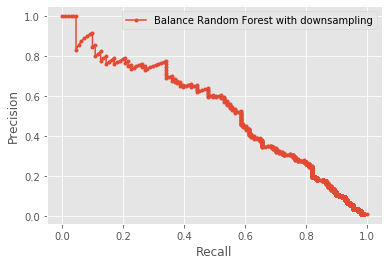

<Figure size 432x288 with 0 Axes>

In [26]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score, pos_label=1)
# calculate F1 score

# calculate precision-recall AUC
# auc_rp = auc(recall, precision)


# # calculate scores
# ns_f1, ns_auc = f1_score(testy, no_skill_probs), auc(ns_recall, ns_precision)
# lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# # summarize scores
# print('No Skill: f1=%.3f auc=%.3f' % (ns_f1, ns_auc))
# print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves

plt.plot(recall, precision, marker='.', label='Balance Random Forest with downsampling')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
plt.savefig('Precision_Recall_curve1')

In [ ]:
precision, recall, thresholds

In [101]:
len(precision)

5063

In [74]:
precision[1421], recall[1421], thresholds[1421]

(0.011045285671252134, 0.990990990990991, 0.3523908084312102)

In [109]:
recall[0:150]

array([1.        , 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.99099099, 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.99099099, 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.99099099, 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.99099099, 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.99099099, 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.99099099, 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.99099099, 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.99099099, 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.99099099, 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.99099099, 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.99099099, 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.99099099, 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.99099099, 0.99099099, 0.99099099, 0.99099099, 0.99099099,
       0.99099099, 0.99099099, 0.99099099, 0.99099099, 0.99099

In [111]:

epochs_data_sz = epochs['Seizure'].get_data()
print(epochs_data_sz.shape)

(442, 23, 129)


In [112]:
evoked = epochs['Seizure'].average()
print(evoked)

<Evoked  |  'Seizure' (average, N=442), [-0.5, 0.5] sec, 23 ch, ~89 kB>


In [113]:
fig = evoked.plot()
plt.savefig('evoked1')

In [77]:
raws.plot(events=events_from_annot, n_channels=23)

KeyboardInterrupt: 

In [34]:
plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.savefig('Precision and Recall vs thresholds')

In [38]:
precision_recall_threshold(precision, recall, thresholds)

     pred_neg  pred_pos
neg     34050      2326
pos         5       106


In [76]:
adjusted_class_predictions = adjusted_classes(y_scores, t=.352 )

In [16]:

clf = BalancedRandomForestClassifier(n_jobs=1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 200, 300],
    'max_depth': [3, 5, 110],
    
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [25]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

In [ ]:
def grid_search_wrapper(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, refit_score='recall_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, n_jobs=1, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, )
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [29]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [44]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

In [18]:
grid_search_clf = grid_search_wrapper(X_train=X_down, y_train=y_down, X_test=X_test, y_test=y_test, refit_score='recall_score')

NameError: name 'grid_search_wrapper' is not defined

In [ ]:
data.times[766976], data.times[776960], 766976/2996

In [ ]:
data.times[-1]

In [ ]:

tmin, tmax = -0.5, 0.5
epochs = mne.Epochs(raws, events_from_annot, event_id, tmin, tmax, proj=True,
                    decim=2, baseline=None, preload=True)

labels = epochs.events[:, -1]

# get MEG and EEG data
fif_epochs = epochs.copy().pick_types(meg=False, eeg=True)
fif_data = fif_epochs.get_data().reshape(len(labels), -1)

In [ ]:
2996.0

In [ ]:
evoked = epochs.average()
evoked.plot(spatial_colors=True)

In [ ]:
picks = mne.pick_types(epochs.info, meg=False, eeg=True)
X = epochs.get_data()[:, picks]
y = epochs.events[:, 2]

clf = make_pipeline(StandardScaler(), LogisticRegression())

X_2d = X.reshape(len(X), -1)
scores = cross_val_score(clf, X_2d, y, cv=5, n_jobs=1, scoring='accuracy')

#Mean scores across cross-validation splits
print("Cross-Validation (Accuracy) score : %s" % np.mean(scores))


In [ ]:
numpy.fft.fftn(a, s=None, axes=None, norm=None)